3000 3002
602 602


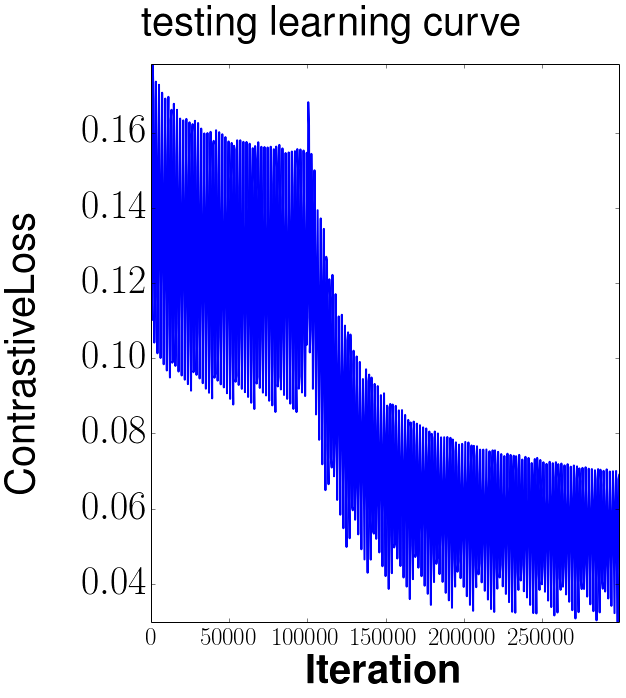

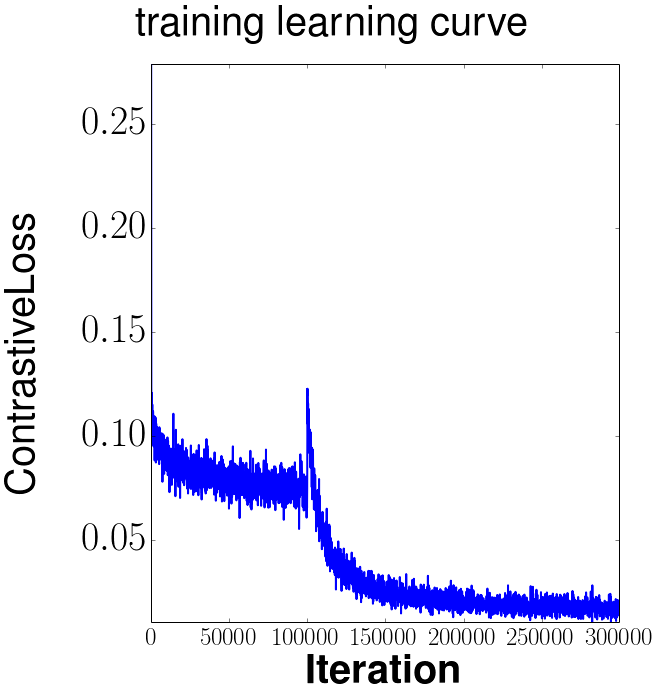

In [3]:
import os
def readFile(fName, lossStr):
    text_file = open(fName, "r")
    lines = text_file.read().split('\n')
    testLoss = []
    trainLoss = []
    trainIter = []
    testIter = []
    for l in range(len(lines)):
        if lines[l].find('Iteration ')!=-1:
            if lines[l].find(', Testing net')!=-1:
                temp = lines[l].split(',')
                temp = temp[0].split(' Iteration ')[1]
                testIter.append(temp)
            if lines[l].find('loss =')!=-1:
                temp = lines[l].split(', loss =')
                #trainLoss.append(temp[1])
                trainIter.append(temp[0].split(' Iteration ')[1])
        if lines[l].find(lossStr+' =')!=-1 and lines[l].find('Test net output')!=-1:
            temp = lines[l].split(': ')
            temp = temp[1].split(' ')[2]
            testLoss.append(temp)
        if lines[l].find(lossStr+' =')!=-1 and lines[l].find('Train net output')!=-1:
            temp = lines[l].split(': ')
            temp = temp[1].split(' ')[2]
            trainLoss.append(temp)
    text_file.close()
    return testLoss,trainLoss,testIter,trainIter

import matplotlib
import numpy as np
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatter
import matplotlib.ticker as ticker
%matplotlib inline
#####plot#############
def linePlot(xData, yData,yStr,xStr,figName,figTitle):
    xData = np.asarray(xData)
    yData = np.asarray(yData)
    # set the figure size
    figSize = 10
    fontSize = figSize/7.5*30
    lWidth = 2
    # start plotting figures
    fig = plt.figure()
    # line plot 1 
    a=fig.add_subplot(1,1,1)
    plt.plot(xData, yData,'b-',linewidth = lWidth)
    plt.axis('tight')
    plt.xlabel(r'\textbf{'+xStr+'}',fontsize = fontSize)
    plt.tick_params(axis='y', labelsize=fontSize)
    plt.tick_params(axis='x', labelsize=fontSize-15)
    fig.subplots_adjust(left=0.25)
    fig.text(0.05, 0.5, yStr, va='center', rotation='vertical',fontsize = fontSize)
    # show and save figure
    fig.suptitle(figTitle,fontsize = fontSize)
    fig = plt.gcf()
    fig.set_size_inches(figSize, figSize)
    #fig.savefig(figName+'.jpg', dpi=300)
    plt.show()
    return
testLoss1, trainLoss1,testIter1,trainIter1 \
= readFile('/raid/linjieli/caffe/logFile/mylog_gd.log','loss')
testLoss,trainLoss,testIter,trainIter \
= readFile('/raid/linjieli/caffe/logFile/mylog_gd_subAll.log','loss')
testIter = [str(int(y)+int(max(testIter1))) for y in testIter]
trainIter = [str(int(y)+int(max(trainIter1))) for y in trainIter]
testIter = testIter1+testIter
trainIter = trainIter1+trainIter
testLoss = testLoss1+testLoss
trainLoss = trainLoss1+trainLoss
# print testLoss,testIter
print len(trainLoss),len(trainIter)
print len(testLoss), len(testIter)
linePlot(testIter[:], testLoss[:],'ContrastiveLoss','Iteration','',\
         'testing learning curve')
linePlot(trainIter[: len(trainLoss)], trainLoss[:],'ContrastiveLoss',\
         'Iteration','','training learning curve')
#print testIter
